In [1]:
import seaborn as sns
import pylab as pl
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm
import pickle
import matplotlib.pyplot as plt
import sys
from mpl_toolkits.mplot3d import Axes3D
# from scipy.spatial.distance import squareform, pdist,cdist
import scipy.spatial.distance as sp_spat_dist
import scipy.stats as sp_st
import scipy.signal as sp_sig
from sklearn.cross_decomposition import PLSRegression, CCA
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import LeaveOneGroupOut, LeaveOneOut, train_test_split
from sklearn.metrics import explained_variance_score
from scipy.optimize import fsolve
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch, ArrowStyle
from mpl_toolkits.mplot3d import proj3d
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import statsmodels.api as sm
from statsmodels.formula.api import ols


from matplotlib import gridspec


import sys
sys.path.append('/home/jyotika/Utils/hddm/')

import hddm


In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
sns.set(style='white',font_scale=2.5)

In [4]:
off_data_dir = "../Data/GA/Cx_D1_mostly_positive/o_f_f/" #" wo_corticostriatal/" "../Data/GA/o_f_f/"
on_data_dir = "../Data/GA/Cx_D1_mostly_positive/on_off/"
figure_dir = "../Figures/"
plt.rcParams["figure.facecolor"] = "w"
plos_cb_off = "../Data/"

In [5]:
data_dir_reg1 = "../churchland_code/Data/GA/Cx_D1_mostly_positive/" #" wo_corticostriatal/"
figure_dir = "../Figures/"

data_dir_reg2 = "../Data/GA/"
# data_dir_reg21 = "../Data/GA/o_f_f/"

data_dir_reg1_on = "../churchland_code/Data/GA/Cx_D1_mostly_positive/"

data_dir_reg2_on = "../../Data/"

plt.rcParams["figure.facecolor"] = "w"


In [6]:
nw_types = ["Fast","Intermediate","Slow"]
markers =["o","X"]
markers_regime = ['D',"P"]
plasticity_status = ["before_plasticity","after_plasticity"]
regimes = ["Cx_BG_driven", "Cx_Th_driven"]

col1 = sns.color_palette()[:]
colors = [col1[1],col1[5],col1[3]]

colors_nw = dict()
for i,nt in enumerate(nw_types):
    colors_nw[nw_types[i]] = colors[i]



In [7]:
def func_fill_df(feat_dict,feat_name):
    df = pd.DataFrame()
    for k in feat_dict.keys():
        temp = pd.DataFrame()
        temp["network_type"] = [k]
        for i in np.arange(len(feat_dict[k])):
            dat = feat_dict[k][i]
            #print(dat[0])
            temp["state"] = [dat[0]]
            temp["cosine distance"] = [dat[1]]
            df = pd.concat([df,temp])
    df["feature_name"] = feat_name
    return df

In [8]:
# postfix="minimum"
# postfix="artificial"
postfix="local"


In [9]:
# rt_dist_from_optimal = pickle.load(open(data_dir_reg1_on+"rt_dist_from_optimal_"+postfix+".pickle","rb"))
# acc_dist_from_optimal = pickle.load(open(data_dir_reg1_on+"acc_dist_from_optimal_"+postfix+".pickle","rb"))
# rr_dist_from_optimal = pickle.load(open(data_dir_reg1_on+"rr_dist_from_optimal_"+postfix+".pickle","rb"))
rt_dist_from_optimal = pickle.load(open(data_dir_reg1_on+"rt_dist_from_optimal_all_nws"+postfix+".pickle","rb"))
acc_dist_from_optimal = pickle.load(open(data_dir_reg1_on+"acc_dist_from_optimal_all_nws"+postfix+".pickle","rb"))
rr_dist_from_optimal = pickle.load(open(data_dir_reg1_on+"rr_dist_from_optimal_all_nws"+postfix+".pickle","rb"))

In [10]:
cosine_distance_features = pd.DataFrame()
# rt_df = func_fill_df(rt_dist_from_optimal, "RT")
# acc_df = func_fill_df(acc_dist_from_optimal, "Accuracy")
# rr_df = func_fill_df(rr_dist_from_optimal, "Reward rate")
rt_dist_from_optimal["feature_name"] = "RT"
acc_dist_from_optimal["feature_name"] = "Accuracy"
rr_dist_from_optimal["feature_name"] = "Reward rate"



cosine_distance_features = pd.concat([rt_dist_from_optimal, acc_dist_from_optimal, rr_dist_from_optimal]).reset_index()
cosine_distance_features = cosine_distance_features.rename(columns={'cosine_distance':'cosine distance'})

# for k in rt_dist_from_optimal.keys():
#     temp = pd.DataFrame()
#     temp["network_type"] = k
#     for i in np.arange(len(rt_dist_from_optimal[k])):
#         dat = 
#         temp["state"] = 

In [11]:
comp_rt_acc =  rt_dist_from_optimal.merge(acc_dist_from_optimal,on=["network_type","seed","state"])
comp_rt_rr =  rt_dist_from_optimal.merge(rr_dist_from_optimal,on=["network_type","seed","state"])
comp_rr_acc =  rr_dist_from_optimal.merge(acc_dist_from_optimal,on=["network_type","seed","state"])

comp_rt_acc = comp_rt_acc.rename(columns={'cosine_distance_x':'cosine_distance(RT)', 'cosine_distance_y':'cosine_distance(Accuracy)'})
comp_rt_rr = comp_rt_rr.rename(columns={'cosine_distance_x':'cosine_distance(RT)', 'cosine_distance_y':'cosine_distance(Reward rate)'})
comp_rr_acc = comp_rr_acc.rename(columns={'cosine_distance_x':'cosine_distance(Reward rate)', 'cosine_distance_y':'cosine_distance(Accuracy)'})




In [12]:
comp_rt_acc["RT - Accuracy"] = comp_rt_acc["cosine_distance(RT)"].values - comp_rt_acc["cosine_distance(Accuracy)"].values
comp_rt_rr["RT - Reward rate"] = comp_rt_rr["cosine_distance(RT)"].values - comp_rt_rr["cosine_distance(Reward rate)"].values
comp_rr_acc["Accuracy - Reward rate"] = comp_rr_acc["cosine_distance(Accuracy)"].values - comp_rr_acc["cosine_distance(Reward rate)"].values

to_plot_comparisons = pd.DataFrame()
to_plot_comparisons = comp_rt_acc.merge(comp_rt_rr,on=["network_type","seed","state"])
to_plot_comparisons = to_plot_comparisons.merge(comp_rr_acc,on =["network_type","seed","state"])

final_comparison = to_plot_comparisons[["network_type","seed","state","RT - Accuracy","RT - Reward rate","Accuracy - Reward rate"]]

In [13]:
final_comparison
final_comparison_melt = final_comparison.melt(id_vars=["network_type","seed","state"])

In [14]:
final_comparison_melt = final_comparison_melt.rename(columns={'value':'cosine distance'})

/tmp/ipykernel_1228818/2162109421.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="variable",y="cosine distance",data=final_comparison_melt,ax=ax,s=5,alpha=0.3,palette='winter')
/home/jyotika/Utils/envs/for_pymc3_python3.8_clean/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 14.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/jyotika/Utils/envs/for_pymc3_python3.8_clean/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/jyotika/Utils/envs/for_pymc3_python3.8_clean/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 16.7% of the points ca

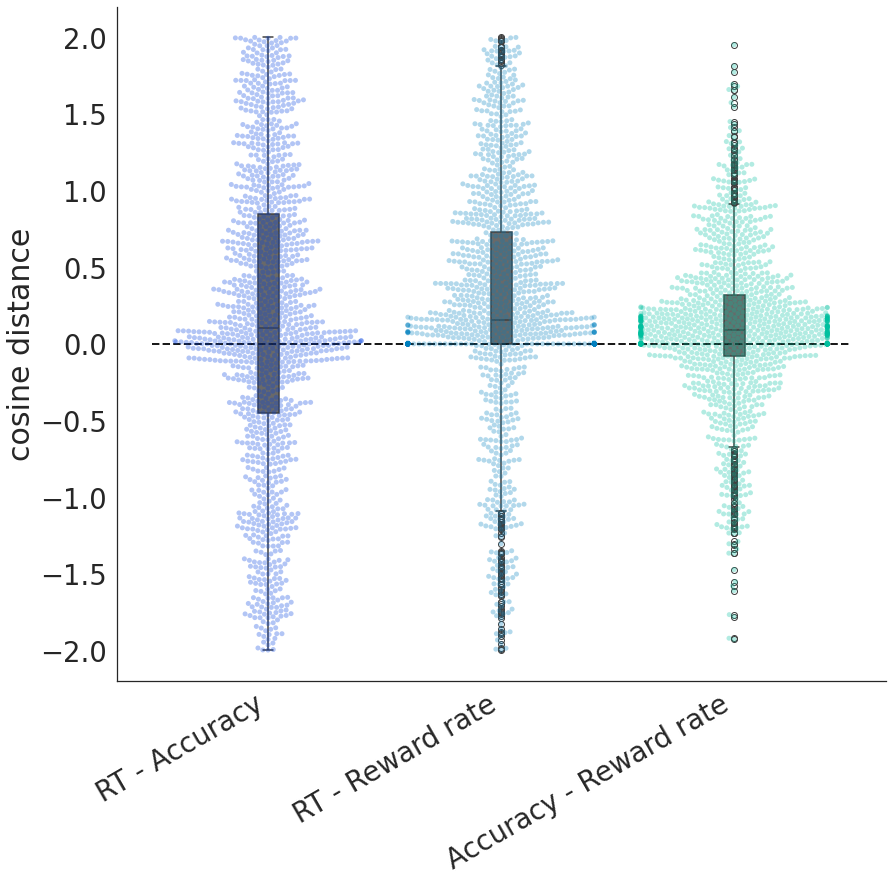

In [15]:
fig,ax = pl.subplots(1,1,figsize=(12,12))
# sns.violinplot(x="variable",y="cosine distance",data=final_comparison_melt,palette='winter',ax=ax,inner=None,width=1.0)
# plt.setp(ax.collections, alpha=.4)
sns.swarmplot(x="variable",y="cosine distance",data=final_comparison_melt,ax=ax,s=5,alpha=0.3,palette='winter')
# sns.boxenplot("variable",y="cosine distance",data=final_comparison_melt, width=0.09,linewidth=1.5,color="dimgrey") #palette='winter'
sns.boxplot(x="variable",y="cosine distance",width=0.09,linewidth=1.5,color="dimgrey",data=final_comparison_melt) #palette='winter'
# plt.setp(ax.collections, alpha=.5)

for x in ax.get_xticklabels():
    x.set_rotation(30)
    x.set_ha('right')
    # x.set_fontsize(25)
xlims = ax.get_xlim()
ax.hlines(y=0,xmin=xlims[0],xmax=xlims[1],color='k',ls='dashed',lw=2.0)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.set_xlabel("")
plt.tight_layout()
fig.subplots_adjust(bottom=0.22,top=1.0,right=0.99,left=0.1)
fig.savefig(figure_dir+"difference_distances_all_nws_"+postfix+"_woviolin.png",dpi=300)
fig.savefig(figure_dir+"difference_distances_all_nws_"+postfix+"_woviolin.pdf")

In [16]:
df_sm = final_comparison_melt[["variable","cosine distance"]].copy()

In [17]:
df_sm = df_sm.rename(columns={'cosine distance':'value'})

In [18]:
model = ols('value ~ C(variable)', data=df_sm).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(variable),15.202832,2.0,12.518015,0.000004
Residual,2315.398924,3813.0,NaN,NaN


In [19]:
print(sp_st.ttest_1samp(comp_rt_acc["RT - Accuracy"].values,popmean=0.0))
print(sp_st.ttest_1samp(comp_rt_rr["RT - Reward rate"].values,popmean=0.0))
print(sp_st.ttest_1samp(comp_rr_acc["Accuracy - Reward rate"].values,popmean=0.0))


TtestResult(statistic=5.5621583029282515, pvalue=3.245212213626547e-08, df=1271)
TtestResult(statistic=11.545188138209427, pvalue=2.154491871346355e-29, df=1271)
TtestResult(statistic=7.07147569514726, pvalue=2.5234763237255614e-12, df=1271)


In [20]:
cosine_distance_features

,index,network_type,seed,state,cosine distance,feature_name
0,0,Fast,34354,after 2 plasticity trials,0.293707,RT
1,0,Fast,34354,after 4 plasticity trials,0.640747,RT
2,0,Fast,34354,after 6 plasticity trials,1.458126,RT
3,0,Fast,34354,after 15 plasticity trials,0.764275,RT
4,0,Fast,34357,after 2 plasticity trials,0.107125,RT
...,...,...,...,...,...,...
3811,0,Slow,34668,after 15 plasticity trials,0.551207,Reward rate
3812,0,Slow,34675,after 2 plasticity trials,0.001774,Reward rate
3813,0,Slow,34675,after 4 plasticity trials,0.539285,Reward rate
3814,0,Slow,34675,after 6 plasticity trials,0.031039,Reward rate


In [21]:
for_stats = cosine_distance_features.copy()
for_stats = for_stats.rename(columns={'cosine distance':'cosine_distance'})

In [22]:
for_stats

,index,network_type,seed,state,cosine_distance,feature_name
0,0,Fast,34354,after 2 plasticity trials,0.293707,RT
1,0,Fast,34354,after 4 plasticity trials,0.640747,RT
2,0,Fast,34354,after 6 plasticity trials,1.458126,RT
3,0,Fast,34354,after 15 plasticity trials,0.764275,RT
4,0,Fast,34357,after 2 plasticity trials,0.107125,RT
...,...,...,...,...,...,...
3811,0,Slow,34668,after 15 plasticity trials,0.551207,Reward rate
3812,0,Slow,34675,after 2 plasticity trials,0.001774,Reward rate
3813,0,Slow,34675,after 4 plasticity trials,0.539285,Reward rate
3814,0,Slow,34675,after 6 plasticity trials,0.031039,Reward rate


In [23]:
# cosine_distance_features = cosine_distance_features.rename(columns={'cosine distance':'euclidean'})

In [24]:
model = ols('cosine_distance ~ C(feature_name)', data=for_stats).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(feature_name),41.356173,2.0,47.208931,5.586645e-21
Residual,1670.140439,3813.0,NaN,NaN


<AxesSubplot:xlabel='feature_name', ylabel='cosine distance'>

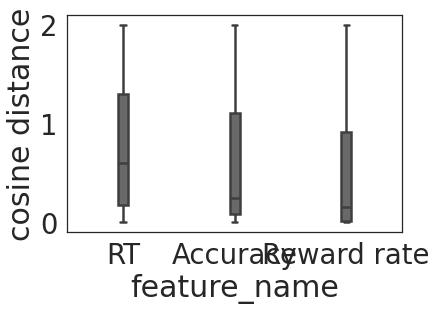

In [25]:
sns.boxplot(data=cosine_distance_features,x="feature_name",y="cosine distance",color="dimgray", width=0.09,linewidth=2.5)

/tmp/ipykernel_1228818/3765278089.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="feature_name",y="cosine distance",data=cosine_distance_features,ax=ax,s=5.0,alpha=0.3,palette='winter')
/home/jyotika/Utils/envs/for_pymc3_python3.8_clean/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 19.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/jyotika/Utils/envs/for_pymc3_python3.8_clean/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/jyotika/Utils/envs/for_pymc3_python3.8_clean/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 19.5% of the

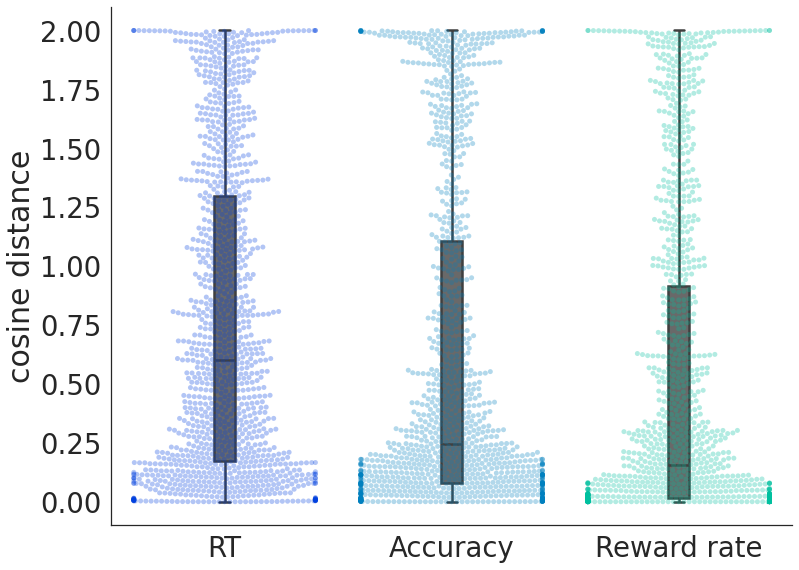

In [26]:
# sns.barplot(x="feature_name",y="cosine distance",data=cosine_distance_features,hue='network_type',palette=colors_nw)
fig,ax = pl.subplots(1,1,figsize=(11,8))
# sns.barplot(x="feature_name",y="cosine distance",data=cosine_distance_features,alpha=0.5,palette='winter',ax=ax)
# sns.swarmplot(x="feature_name",y="cosine distance",data=cosine_distance_features,ax=ax,s=15,alpha=0.8,palette='winter')
# sns.swarmplot(x="feature_name",y="cosine distance",data=cosine_distance_features,ax=ax,s=5,alpha=0.6,palette='winter')
#sns.violinplot(x="feature_name",y="cosine distance",data=cosine_distance_features,palette='winter',ax=ax,inner=None)
plt.setp(ax.collections, alpha=.4)
# sns.boxenplot("feature_name",y="cosine distance",data=cosine_distance_features,color="dimgray", width=0.09,linewidth=2.5)
sns.boxplot(data=cosine_distance_features,x="feature_name",y="cosine distance",color="dimgray", width=0.09,linewidth=2.5)
sns.swarmplot(x="feature_name",y="cosine distance",data=cosine_distance_features,ax=ax,s=5.0,alpha=0.3,palette='winter')
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.set_xlabel("")
plt.tight_layout()
fig.subplots_adjust(bottom=0.1,top=1.0,right=0.99,left=0.13)
# g1 = sns.barplot(x="feature_name",y="euclidean",data=cosine_distance_features)
fig.savefig(figure_dir+"distance_pooled_all_nws_"+postfix+".png",dpi=300)
fig.savefig(figure_dir+"distance_pooled_all_nws_"+postfix+".pdf")

In [39]:
mean_plasticity_stages = cosine_distance_features.groupby(['seed','network_type','feature_name'])['cosine distance'].mean().reset_index()

In [40]:
mean_plasticity_stages

,seed,network_type,feature_name,cosine distance
0,34341,Slow,Accuracy,0.501600
1,34341,Slow,RT,0.955846
2,34341,Slow,Reward rate,0.462256
3,34343,Slow,Accuracy,0.682471
4,34343,Slow,RT,0.614914
...,...,...,...,...
949,34681,Fast,RT,1.105404
950,34681,Fast,Reward rate,0.195323
951,34682,Fast,Accuracy,0.584167
952,34682,Fast,RT,0.807774


In [41]:
# rt_all = cosine_distance_features.loc[cosine_distance_features["feature_name"]=="RT"]["cosine distance"].values
# acc_all = cosine_distance_features.loc[cosine_distance_features["feature_name"]=="Accuracy"]["cosine distance"].values
# rr_all = cosine_distance_features.loc[cosine_distance_features["feature_name"]=="Reward rate"]["cosine distance"].values

rt_all = mean_plasticity_stages.loc[mean_plasticity_stages["feature_name"]=="RT"]["cosine distance"].values
acc_all = mean_plasticity_stages.loc[mean_plasticity_stages["feature_name"]=="Accuracy"]["cosine distance"].values
rr_all = mean_plasticity_stages.loc[mean_plasticity_stages["feature_name"]=="Reward rate"]["cosine distance"].values


sp_st.f_oneway(rt_all, acc_all,rr_all)

F_onewayResult(statistic=84.440516026444, pvalue=1.7522765569468246e-34)

In [42]:
print(sp_st.ttest_rel(rt_all, acc_all) )
print(sp_st.ttest_rel(acc_all, rr_all) )
print(sp_st.ttest_rel(rt_all, rr_all) )



TtestResult(statistic=7.030633822155726, pvalue=1.2679064193878503e-11, df=317)
TtestResult(statistic=8.748766868191588, pvalue=1.2976060178341207e-16, df=317)
TtestResult(statistic=13.221906696805595, pvalue=4.365358385504554e-32, df=317)


In [32]:
sm.stats.ttest_ind

# print(sp_st.ttest_ind(rt_all, acc_all) )
# print(sp_st.ttest_ind(acc_all, rr_all) )
# print(sp_st.ttest_ind(rt_all, rr_all) )

print(sm.stats.ttest_ind(rt_all, acc_all) )
print(sm.stats.ttest_ind(acc_all, rr_all) )
print(sm.stats.ttest_ind(rt_all, rr_all) )


(5.745245310412858, 1.0272795435280654e-08, 2542.0)
(3.815677260828869, 0.00013904775021680892, 2542.0)
(9.868024663461686, 1.4490939684967733e-22, 2542.0)


/home/jyotika/Utils/envs/for_pymc3_python3.8_clean/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_1228818/1561649357.py:16: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.tight_layout()
/tmp/ipykernel_1228818/1561649357.py:16: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.tight_layout()
/tmp/ipykernel_1228818/1561649357.py:16: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.

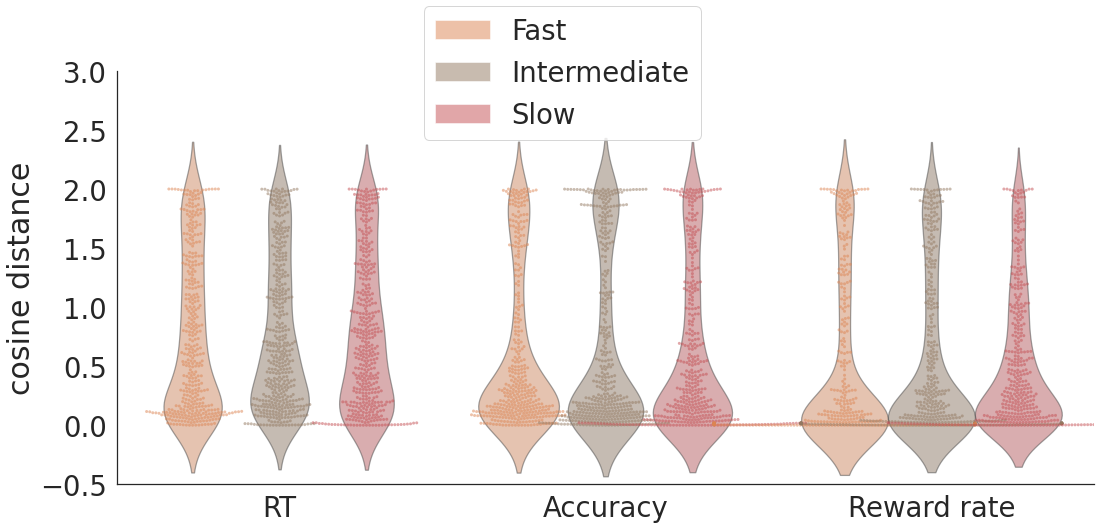

In [33]:
fig,ax = pl.subplots(1,1,figsize=(16,8))

sns.swarmplot(x="feature_name",y="cosine distance",data=cosine_distance_features,ax=ax,s=3,alpha=0.8,palette=colors_nw,hue='network_type',dodge=True)
# sns.barplot(x="feature_name",y="cosine distance",data=cosine_distance_features,hue='network_type',palette=colors_nw,alpha=0.5,ax=ax)
sns.violinplot(x="feature_name",y="cosine distance",data=cosine_distance_features,hue='network_type',palette=colors_nw,alpha=0.5,ax=ax,inner=None)
plt.setp(ax.collections, alpha=.5)
# sns.boxenplot(x="feature_name",y="cosine distance",data=cosine_distance_features,hue='network_type',color="gray", width=0.15,dodge=True)
plt.legend([], [], frameon=False)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
custom_lines = [ Patch(facecolor=colors_nw[nt],  label=nt,alpha=0.5) for nt in nw_types]
ax.legend(custom_lines,nw_types,bbox_to_anchor=(0.3,0.8))
ax.set_xlabel("")
ax.set_ylim(-0.5,3.0)
# g1 = sns.barplot(x="feature_name",y="euclidean",data=cosine_distance_features,hue='network_type',palette=colors_nw)
plt.tight_layout()
fig.savefig(figure_dir+"distance_pooled_states_all_nws"+postfix+".png",dpi=300)

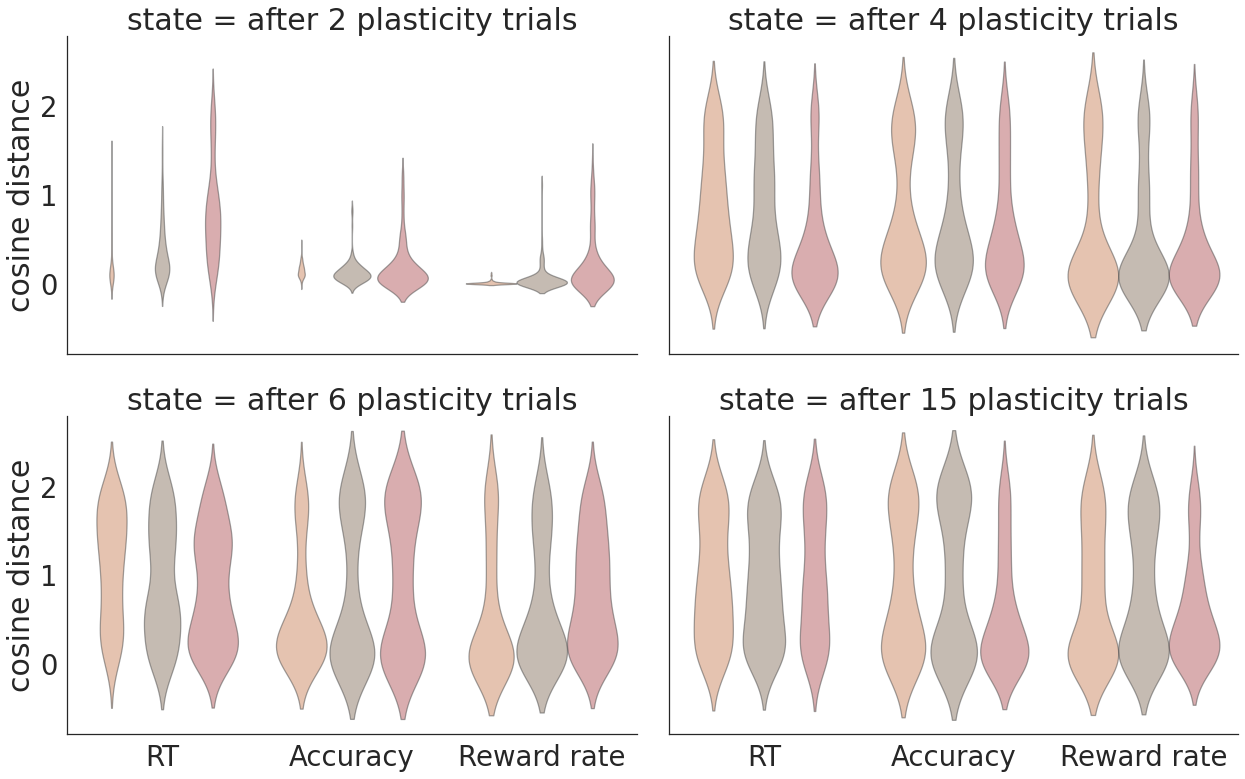

In [34]:
g1 = sns.catplot(x="feature_name",y="cosine distance",data=cosine_distance_features,hue='network_type',palette=colors_nw,col='state',kind='violin',col_wrap=2,height=6,aspect=1.5,alpha=0.7,legend=False,inner=None)

# g1 = sns.catplot(x="state",y="euclidean",data=cosine_distance_features,hue='network_type',palette=colors_nw,col='feature_name',kind='bar',col_wrap=1,height=6,aspect=1.5)
for ax in g1.axes:
    ax.set_xlabel("")
    plt.setp(ax.collections, alpha=.5)
# plt.tight_layout()
g1.figure.savefig(figure_dir+"distance_separate_"+postfix+".png",dpi=300)

In [35]:
cosine_distance_features

,index,network_type,seed,state,cosine distance,feature_name
0,0,Fast,34354,after 2 plasticity trials,0.293707,RT
1,0,Fast,34354,after 4 plasticity trials,0.640747,RT
2,0,Fast,34354,after 6 plasticity trials,1.458126,RT
3,0,Fast,34354,after 15 plasticity trials,0.764275,RT
4,0,Fast,34357,after 2 plasticity trials,0.107125,RT
...,...,...,...,...,...,...
3811,0,Slow,34668,after 15 plasticity trials,0.551207,Reward rate
3812,0,Slow,34675,after 2 plasticity trials,0.001774,Reward rate
3813,0,Slow,34675,after 4 plasticity trials,0.539285,Reward rate
3814,0,Slow,34675,after 6 plasticity trials,0.031039,Reward rate
